In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from multiparam_output_loader import MultiParamOutputLoader

output = MultiParamOutputLoader("/nfs01/covid_sims/1591671340.4890747-asymptomatic_daily_self_report_p")

In [2]:
output.param_scenarios

['Nominal Faculty and Staff Parameters',
 'Optimistic Faculty and Staff Parameters',
 'Pessimistic Faculty and Staff Parameters',
 'Nominal Student Parameters',
 'Optimistic Student Parameters',
 'Pessimistic Student Parameters']

In [3]:
reopen_output = MultiParamOutputLoader("/nfs01/covid_sims/1591671837.0607095-test_protocol_QFNR")

In [4]:
reopen_output.param_scenarios

['Nominal Parameters', 'Optimistic Parameters', 'Pessimistic Parameters']

In [5]:
output.sim_results['Nominal Faculty and Staff Parameters'].keys()

dict_keys([(0.0,)])

In [6]:
len(output.sim_results['Nominal Faculty and Staff Parameters'][(0.0,)])

500

In [7]:
output.sim_results['Nominal Faculty and Staff Parameters'][(0.0,)][0]

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,14986,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.0,0.000000,0.000000,0.000000
1,14980,3,4,0,1,1,1,0,0,0,...,0,0,0,3,1,2,3.0,0.975404,0.018016,0.006580
2,14964,11,6,0,4,0,2,2,0,0,...,0,0,0,5,3,7,5.0,2.926212,0.054047,0.019740
3,14959,6,7,0,3,5,3,3,0,0,...,0,0,0,6,6,11,6.0,5.852425,0.108095,0.039480
4,14951,9,8,0,5,6,4,1,0,0,...,0,0,0,9,8,14,9.0,7.803233,0.144126,0.052640
5,14944,11,13,0,7,6,1,2,0,0,...,0,0,0,13,8,16,13.0,7.803233,0.144126,0.052640
6,14928,23,15,1,6,2,1,0,2,0,...,0,0,0,15,9,17,15.0,8.778637,0.162142,0.059220
7,14929,17,17,1,6,1,0,3,0,0,...,0,0,0,15,12,20,15.0,11.704850,0.216190,0.078961
8,14925,13,17,2,5,2,4,0,0,0,...,0,0,0,17,14,21,17.0,13.655658,0.252221,0.092121
9,14918,9,21,5,6,6,0,2,1,0,...,0,0,0,21,19,22,21.0,18.532679,0.342300,0.125021


In [10]:
df = reopen_output.sim_results['Nominal Parameters'][(0.1,)][0]
df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

1950

In [12]:
def get_cum_infections(df):
    return df[['cumulative_mild', 'cumulative_severe']].iloc[df.shape[0] - 1].sum()

def get_infection_counts(scenario, noreopen_output, reopen_output):
    # scenario must be one of [Nominal, Optimistic, Pessimistic]
    
    # noreopen - non-student population
    nonstudent_key = '{} Faculty and Staff Parameters'.format(scenario)
    nonstudent_counts = [get_cum_infections(df) for df in 
                         noreopen_output.sim_results[nonstudent_key][(0.0,)]]
    
    # noreopen - student population
    student_key = '{} Student Parameters'.format(scenario)
    student_counts = [get_cum_infections(df) for df in 
                         noreopen_output.sim_results[student_key][(0.0,)]]
    
    noreopen_counts = [a + b for a,b in zip(nonstudent_counts, student_counts)]
    
    # reopen population
    key = '{} Parameters'.format(scenario)
    reopen_counts = [get_cum_infections(df) for df in 
                    reopen_output.sim_results[key][(0.1,)]]
    
    return noreopen_counts, reopen_counts


    
    

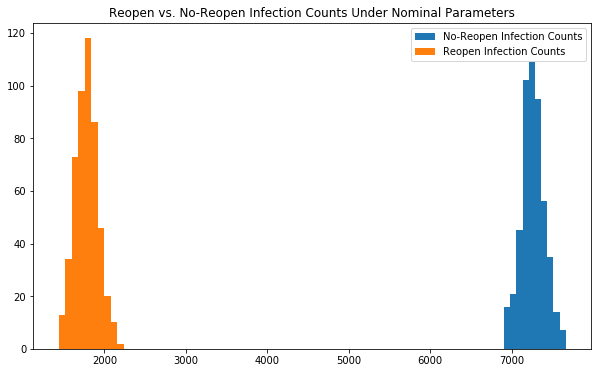

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

scenario = 'Nominal'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

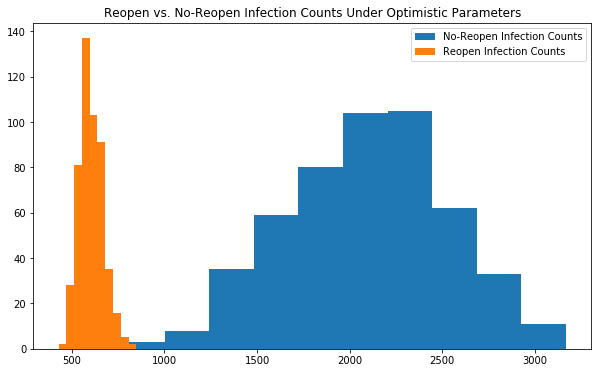

In [16]:
scenario = 'Optimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()

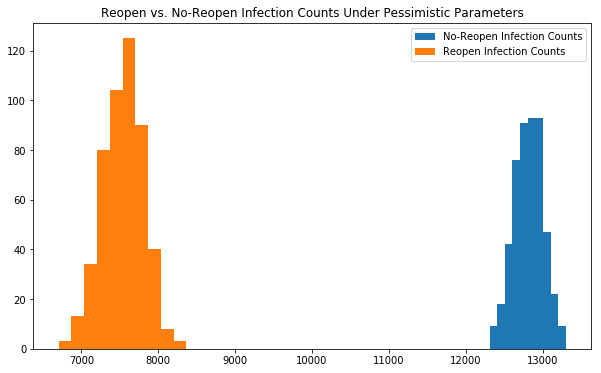

In [17]:
scenario = 'Pessimistic'
plt.figure(figsize=(10,6))
noreopen_counts, reopen_counts = get_infection_counts(scenario, output, reopen_output)
plt.hist(noreopen_counts, label="No-Reopen Infection Counts")
plt.hist(reopen_counts, label="Reopen Infection Counts")
plt.legend(loc='best')
plt.title('Reopen vs. No-Reopen Infection Counts Under {} Parameters'.format(scenario))
plt.show()